In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:

# Load data but dropna which does not work well with date-offsetting
data = pd.read_csv('data/air_quality_data/ozone_nyc.csv', parse_dates=['date'], index_col='date').dropna()
data.head()

,Ozone
date,
2000-01-01,0.004032
2000-01-02,0.009486
2000-01-03,0.005580
2000-01-04,0.008717
2000-01-05,0.013754


In [3]:

# Window functions operate on 'windows', i.e. sub-periods inside some time series
# They enable calculation of metrics for sub-periods inside the window
# Calculate rolling 90d and 360d rolling price
# Using XD is a date-offset method where the rolling stastic is calculated even if there are less obs than the value
# Date-offsetting means while the offset period is fixed, the number of periods can vary, so no NaNs result
data['90D'] = data.Ozone.rolling('90D').mean() # By default, date offset measured in Calendar Days
data['360D'] = data.Ozone.rolling('360D').mean()

In [4]:

# The calculations from window functions create a time series of their own
# Each resulting calculation from a window period becomes a data point in a new time series
# Rolling window makes calculations on sliding windows of the same size 
data.head()

,Ozone,90D,360D
date,,,
2000-01-01,0.004032,0.004032,0.004032
2000-01-02,0.009486,0.006759,0.006759
2000-01-03,0.005580,0.006366,0.006366
2000-01-04,0.008717,0.006954,0.006954
2000-01-05,0.013754,0.008314,0.008314


In [5]:
data.tail()

,Ozone,90D,360D
date,,,
2017-03-27,0.005640,0.021992,0.026629
2017-03-28,0.013870,0.021999,0.026583
2017-03-29,0.034341,0.022235,0.026584
2017-03-30,0.026059,0.022334,0.026599
2017-03-31,0.035983,0.022467,0.026607


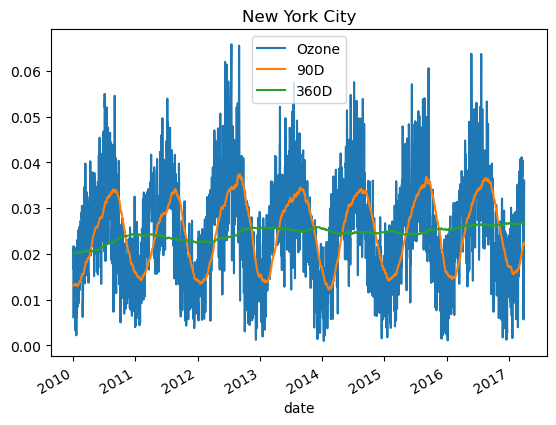

In [6]:

# Plot data from 2010 
data['2010':].plot(title='New York City')
plt.show()

In [7]:

# Use the agg() function to calculate multiple statistics, e.g. mean and std
# NB: choosing an integer-based window means that the result will be NaN until there are no missing values,
# so if there haven't been as many days as the integer, the result is NaN (or, obviously, if there are generally missing data)
# NB: integer-based window behaviour can be changed by setting min_periods param to value smaller than integer
rolling_stats = data.Ozone.rolling(360).agg(['mean', 'std']) # by default Business Days
rolling_stats.head()

,mean,std
date,,
2000-01-01,NaN,NaN
2000-01-02,NaN,NaN
2000-01-03,NaN,NaN
2000-01-04,NaN,NaN
2000-01-05,NaN,NaN


In [8]:
rolling_stats.tail()

,mean,std
date,,
2017-03-27,0.026629,0.011599
2017-03-28,0.026583,0.011617
2017-03-29,0.026584,0.011617
2017-03-30,0.026599,0.011613
2017-03-31,0.026607,0.011618


In [9]:

# Join rolling_stats to data
all_stats = data.join(rolling_stats)
all_stats.head()

,Ozone,90D,360D,mean,std
date,,,,,
2000-01-01,0.004032,0.004032,0.004032,NaN,NaN
2000-01-02,0.009486,0.006759,0.006759,NaN,NaN
2000-01-03,0.005580,0.006366,0.006366,NaN,NaN
2000-01-04,0.008717,0.006954,0.006954,NaN,NaN
2000-01-05,0.013754,0.008314,0.008314,NaN,NaN


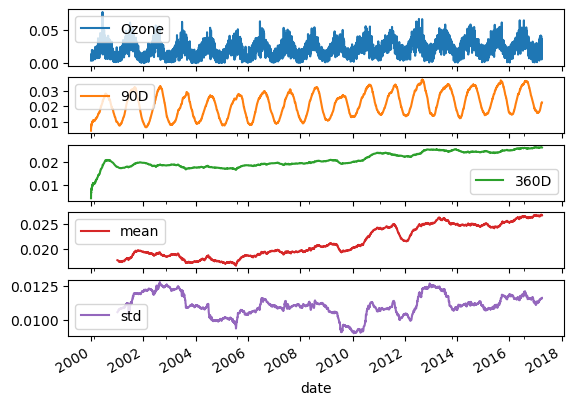

In [10]:

# Plot stats
all_stats.plot(subplots=True);
plt.show()